## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Facundo
- Apellido: Perez
- Legajo: 168410-3

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres.

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue

In [ ]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [ ]:
#Importo libreria de Google Drive Colab para poder leer el dataset
from google.colab import drive
drive.mount('/content/drive/')

#Importo el dataset
diabetes = pd.read_csv('/content/drive/My Drive/ClusterAI_TP_dataset_diabetes_.csv')


Mounted at /content/drive/


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [ ]:
#imprimimos las dimensiones del dataset:
diabetes.shape

(768, 9)

In [ ]:
#controlamos los primeros 5 registros para ver como se importo:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [ ]:
# PISTA: con una sola línea de código podríamos obtener toda esta información
#Con la función info podemos ver el tipo de dato de cada variable y si contiene nulls
diabetes.info()
#vemos que no hay nulos, y los tipos de datos son todos int o float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

In [ ]:
#Podemos ver la distribución de la variable Outcome contando la repetición de los valores, y normalizandolos
diabetes['Outcome'].value_counts(normalize=True,dropna=False)

,proportion
Outcome,
0,0.651042
1,0.348958


##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros.

In [ ]:
#utilizando la funcion describe, obtenemos una descripcion del dataset, trasponemos la matriz para leer mejor los resultados
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615:

Text(0.5, 1.03, 'Pairplot')

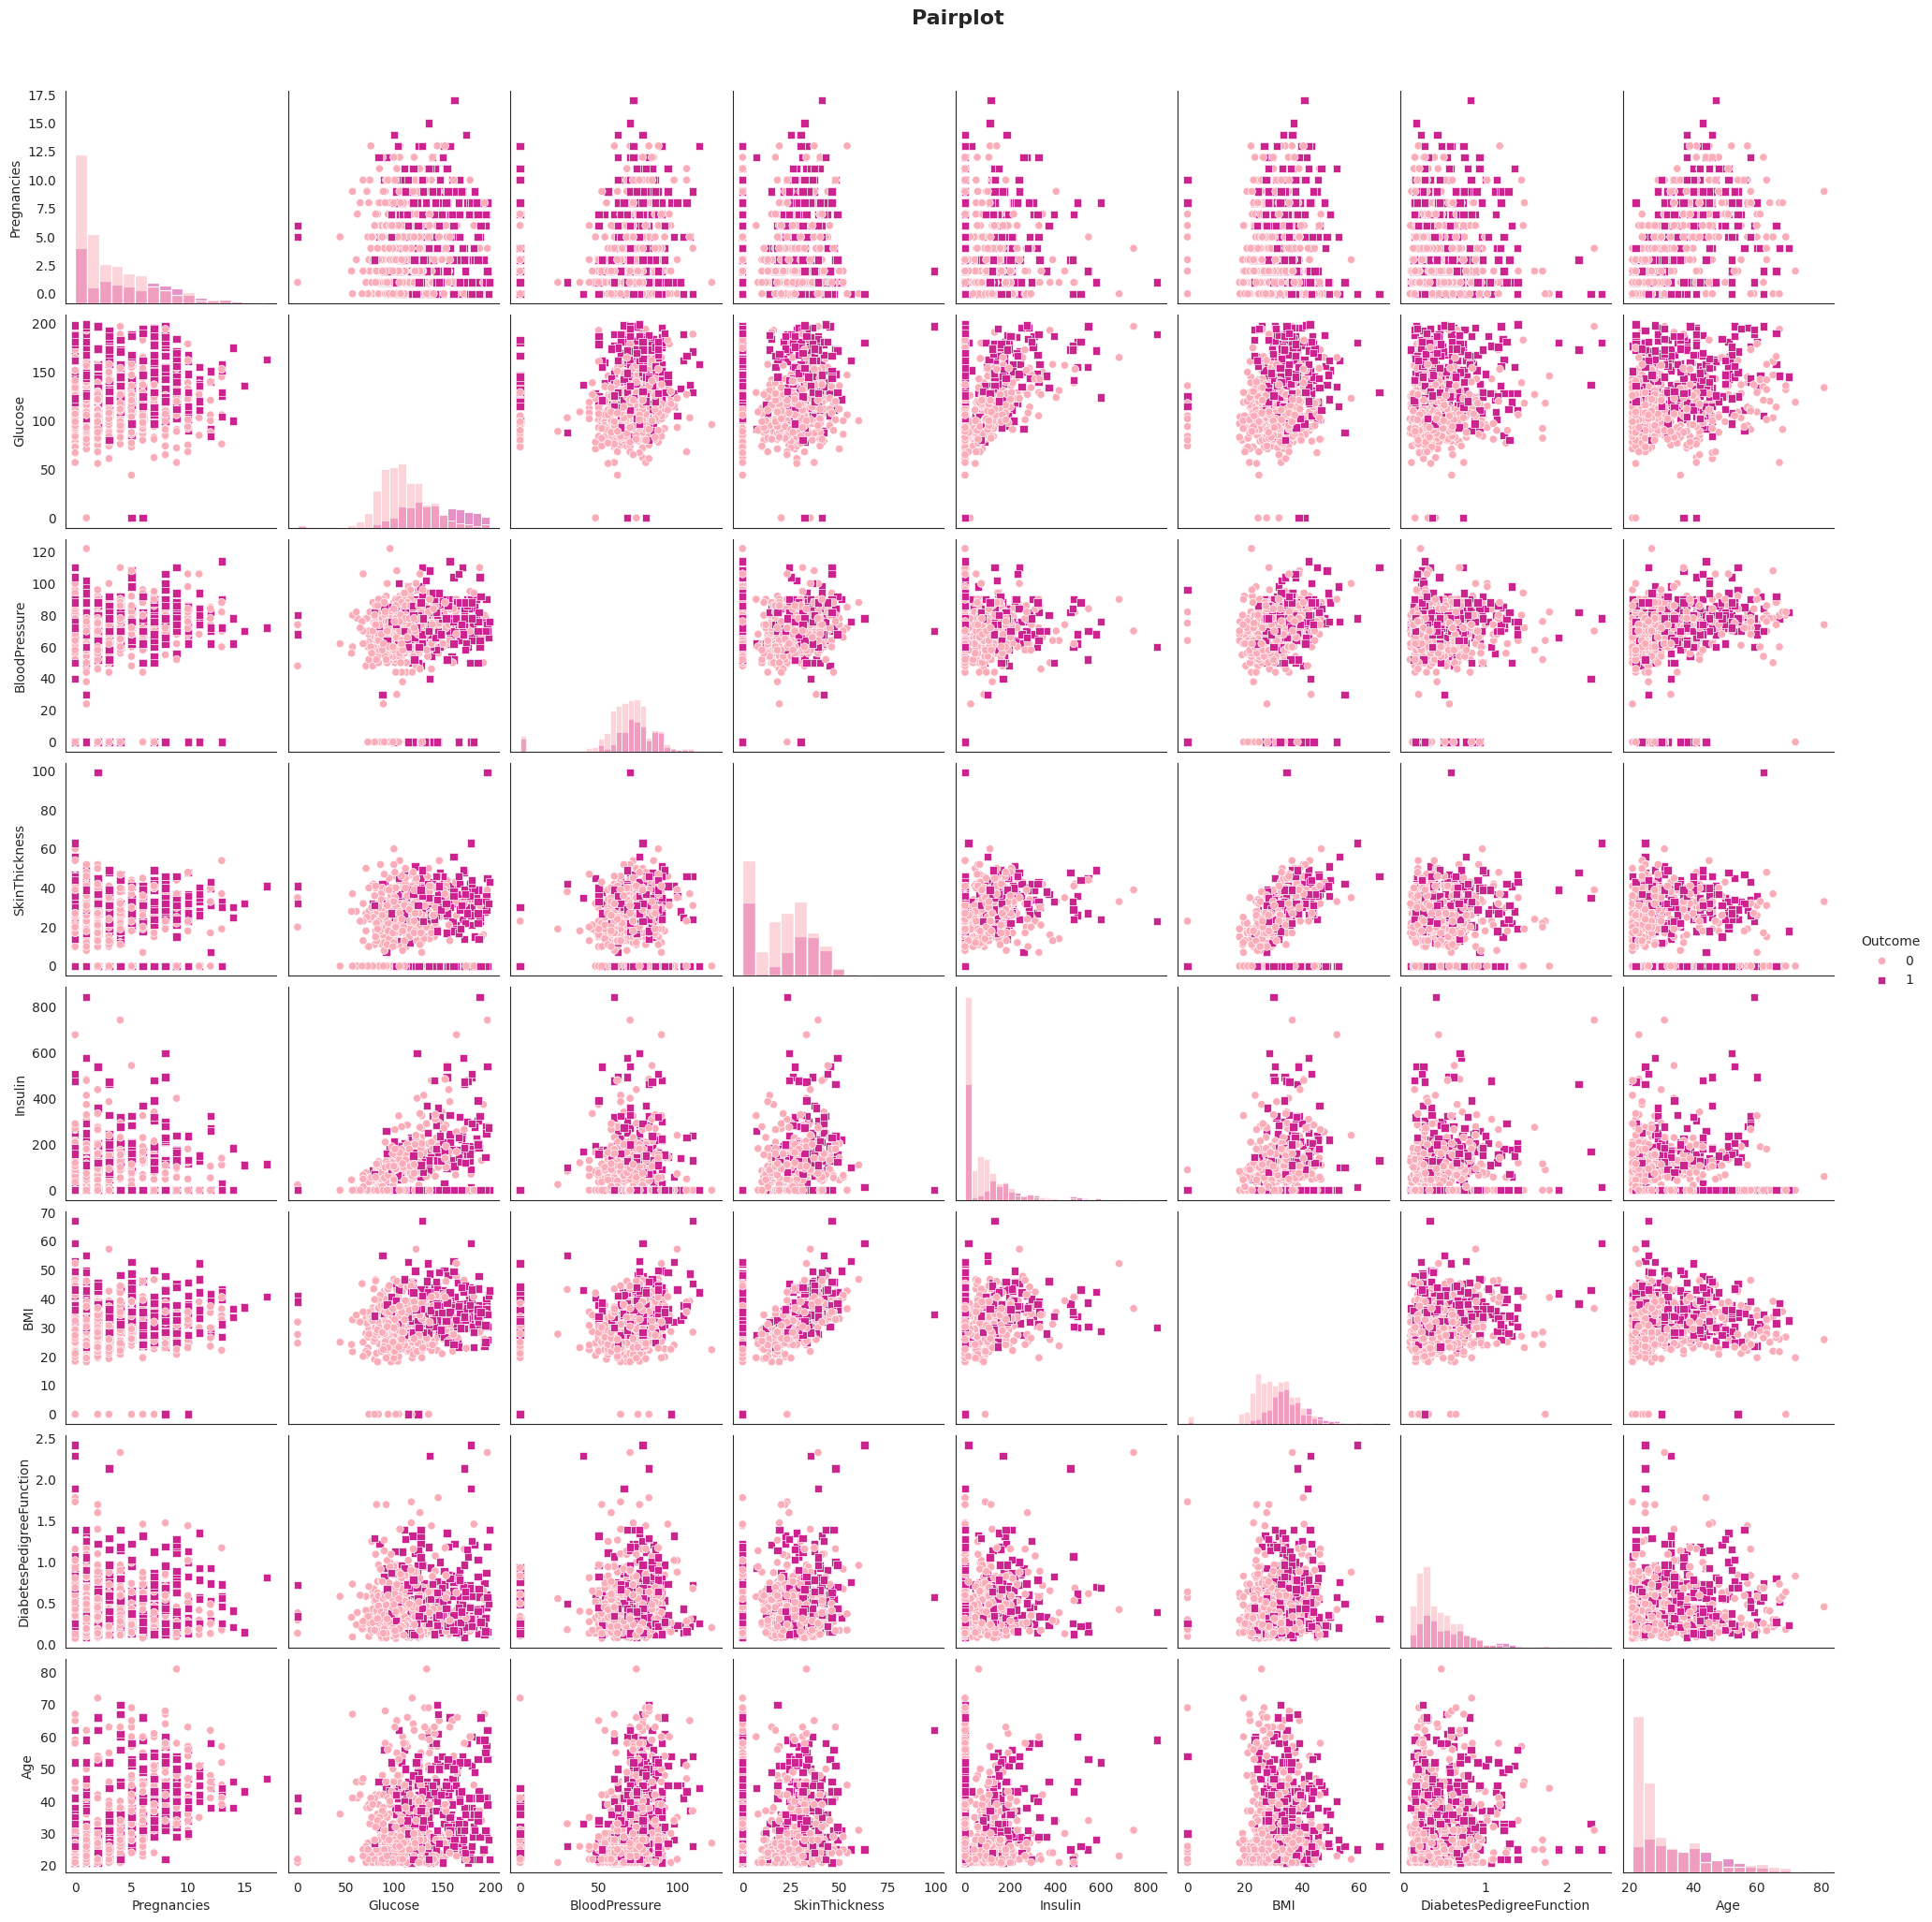

In [ ]:
# Seteo de Tema
sns.set_style('white')
#Detallamos en un vector las caracteristicas (features) que queremos incluir en el pairplot
vars = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Creo el pairplot en función de la variable Outcome
pairplot = sns.pairplot(diabetes, hue = 'Outcome', diag_kind = 'hist', palette = 'RdPu', markers = ['o', 's', 'D'], vars = vars)

# Titulos
pairplot.fig.suptitle('Pairplot', fontweight = 'heavy', y = 1.03, fontsize = '16',
                      fontfamily = 'sans-serif')

## Se observa que en los casos positivos presentan un mayor nivel de glucosa##

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas?
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

In [ ]:
#Para saber la correlación usamos la función corr
diabetes_corr = diabetes.corr()



In [ ]:
#Observamos las dimensiones de la matriz de correlación:
diabetes_corr.shape

(9, 9)

In [ ]:
#visualizamos la matriz:
diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

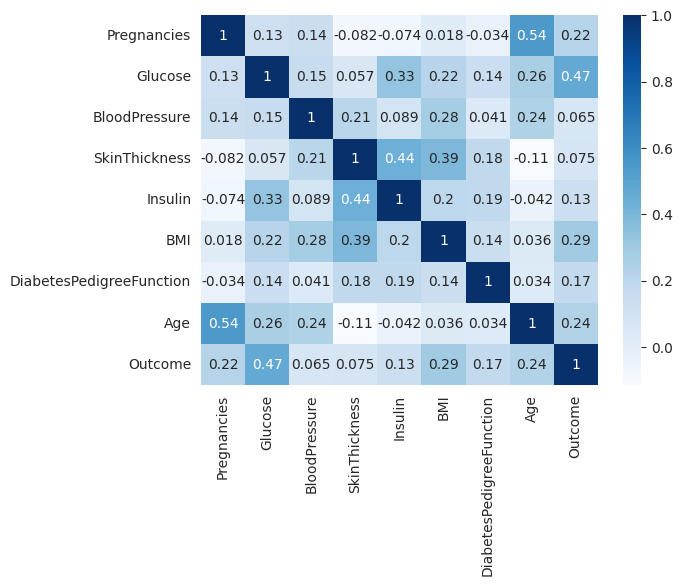

In [ ]:
#mapa de calor de la matriz de correlación
sns.heatmap(diabetes_corr, annot=True, cmap='Blues')

In [ ]:
#notamos que los mayores grados de correlación se presenta en:
# Edad - Cantidad de Embarazos
# GLucosa - Resultado
# Insulina - Piel

##### **Objetivo 8**
Hacer un histograma de la variable BMI

<ipython-input-14-778261cee65c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes['BMI'])


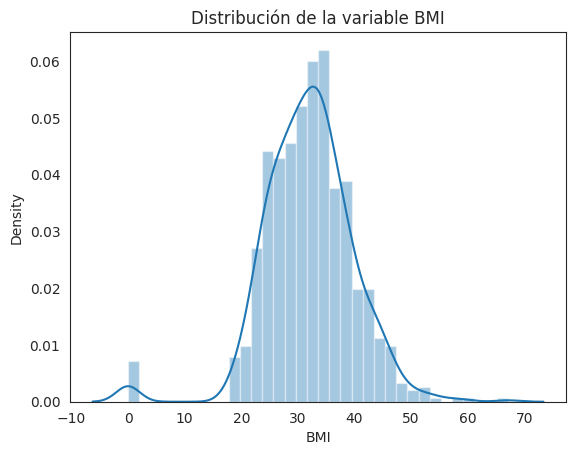

In [ ]:
# displot para la columna "BMI" nos generará un histograma + la distribución generada de los datos
sns.distplot(diabetes['BMI'])
plt.title('Distribución de la variable BMI')
plt.xlabel('BMI')
plt.show()

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

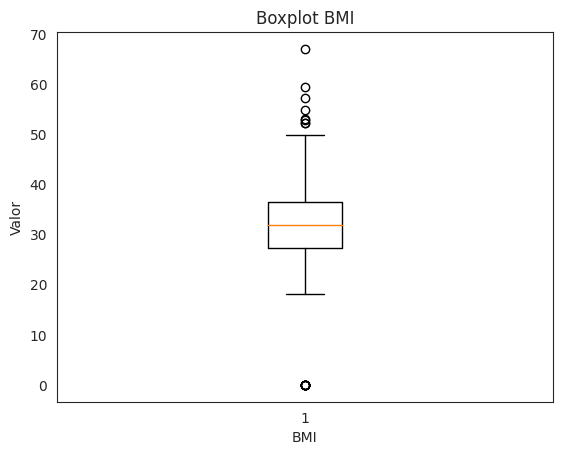

In [ ]:
#se observa en cero una elevada concentración de valores, alejado a la distribución del resto del dataframe
#estos podrian considerarse como valores nulos, registrados como ceros.

# Hacemos un boxplot con Matplotlib
plt.boxplot(diabetes['BMI'])
plt.title('Boxplot BMI')
plt.ylabel('Valor')
plt.xlabel("BMI")
plt.show()

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [ ]:
#1)
# Eliminacion manual de valores que no deberiamos tener en columas
diabetes = diabetes[diabetes['BMI'] != 0]

# Aqui lo que hicimos fue conservar unicamente los registros cuyos valores en la columa "BMI" sean distintos (=!) a 0


##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

<Axes: xlabel='Outcome', ylabel='Glucose'>

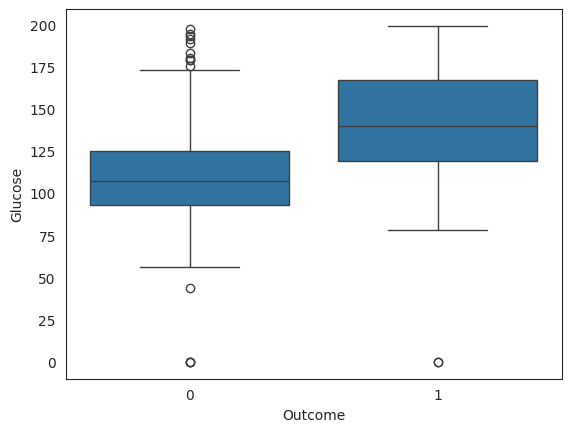

In [ ]:
# Podemos ver la distribucion individuald de cada variable y a su vez sacar algunas conclusiones estadísticas
sns.boxplot(x="Outcome", y="Glucose", data=diabetes)

#Podemos obesrvar que para el caso de ser positivo posee una media mas elevada, proxima a 150, mientras que para el caso negativo es mas cercana a 100
#se observan tambien valores muy por fuera de los whiskers en los resultados negativos, tambien valores 0 que pueden ser atipicos y deben filtrarse

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

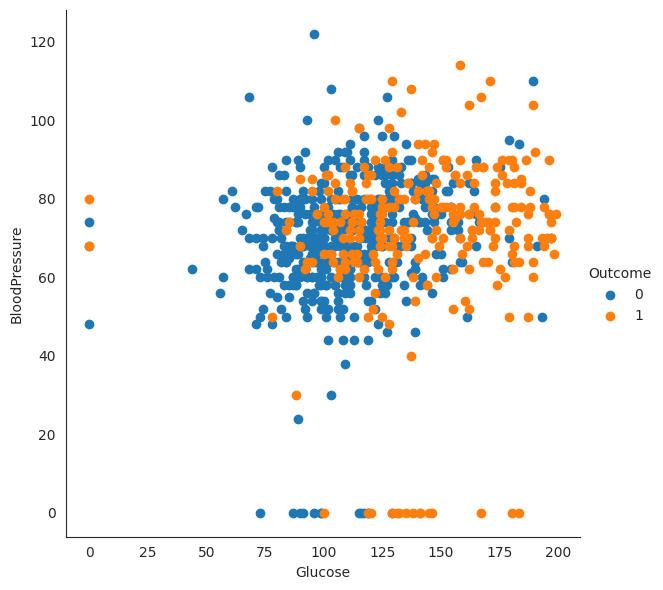

In [ ]:
sns.FacetGrid(diabetes, hue="Outcome", height=6) \
   .map(plt.scatter, "Glucose", "BloodPressure") \
   .add_legend()

   #se observa que en pacientes positivos, muestran niveles mas elevados de glucosa y presion sanguínea, pero no se observa una clara correlación

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [ ]:
#Primero defininmos los limites de cada categoria y creamos la columna 'AgeBand'

diabetes.loc[(diabetes['Age'] > 0) & (diabetes['Age'] <= 30), 'AgeBand'] = '1 Primer Rango'
diabetes.loc[(diabetes['Age'] > 30) & (diabetes['Age'] <= 40), 'AgeBand']   = '2 Segundo Rango'
diabetes.loc[(diabetes['Age'] > 40), 'AgeBand']   = '3 Tercer Rango'

<ipython-input-19-26cbab2e6312>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes.loc[(diabetes['Age'] > 0) & (diabetes['Age'] <= 30), 'AgeBand'] = '1 Primer Rango'


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

<ipython-input-20-f1ffdb94908a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
<ipython-input-20-f1ffdb94908a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=0, ha="center")


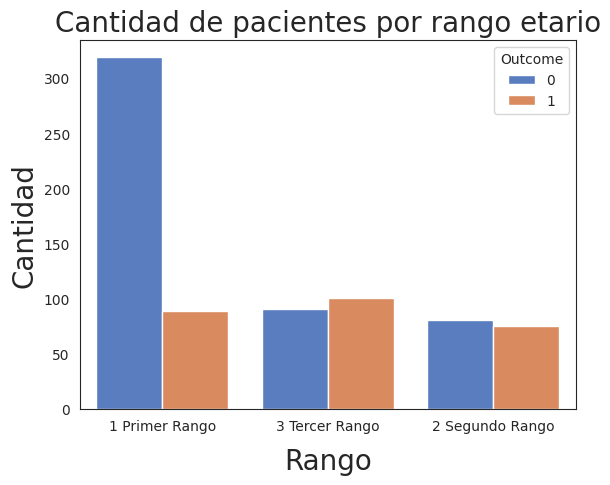

In [ ]:
# Hacemos un Countplot sobre Ageband, discriminando por Outcome (hue)
g = sns.countplot(data=diabetes,
                  x="AgeBand",
                  hue = "Outcome", #Diferenciamos por Outcome
                  order = diabetes["AgeBand"].value_counts().index, #Ordenamos por Ageband
                  palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de pacientes por rango etario', size = 20)
plt.ylabel("Cantidad", size = 20)
plt.xlabel("Rango", size=20, labelpad=10, loc="center")
g.set_xticklabels(g.get_xticklabels(), rotation=0, ha="center")
plt.show()

In [ ]:
#La mayor cantidad de Pacientes son menores a 30 años
#En todos los rangos etarios hay cerca de 100 pacientes con diabetes